In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, KFold, ShuffleSplit,cross_val_score
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

In [4]:
df = pd.read_csv('diabetes.csv ', nrows = 770)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

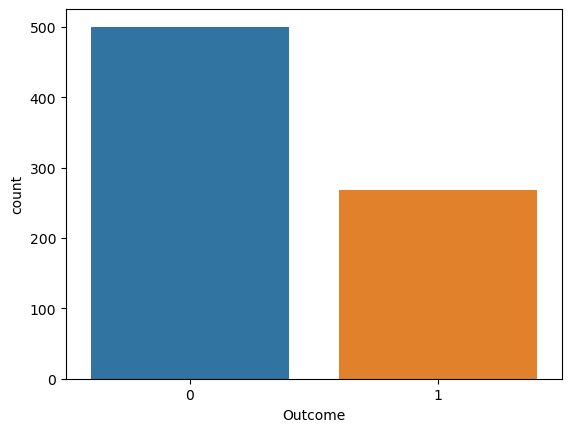

In [11]:
sns.countplot(x = 'Outcome',data = df)

In [12]:
X= df.drop(columns="Outcome",axis=1)
y=df["Outcome"]

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Visualize the data 

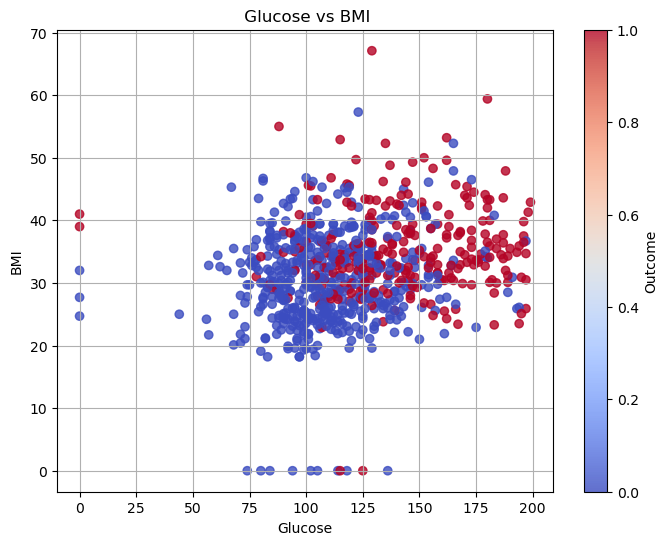

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title(' Glucose vs BMI')
plt.grid(True)
plt.show()

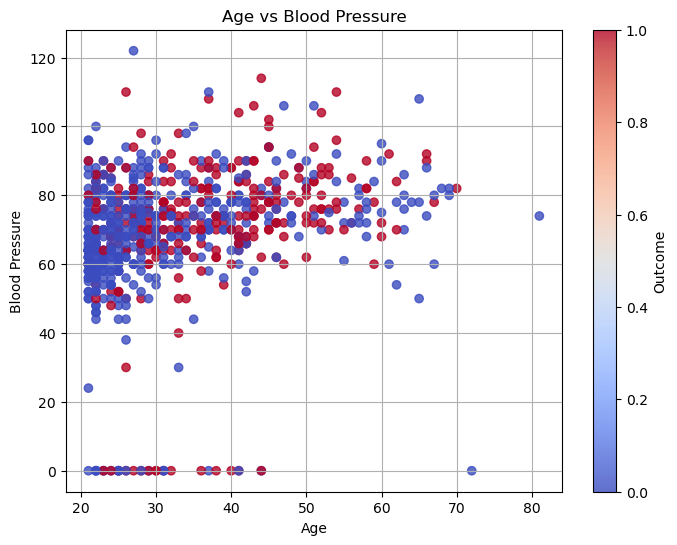

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['BloodPressure'], c=df['Outcome'], cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Outcome')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.grid(True)
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

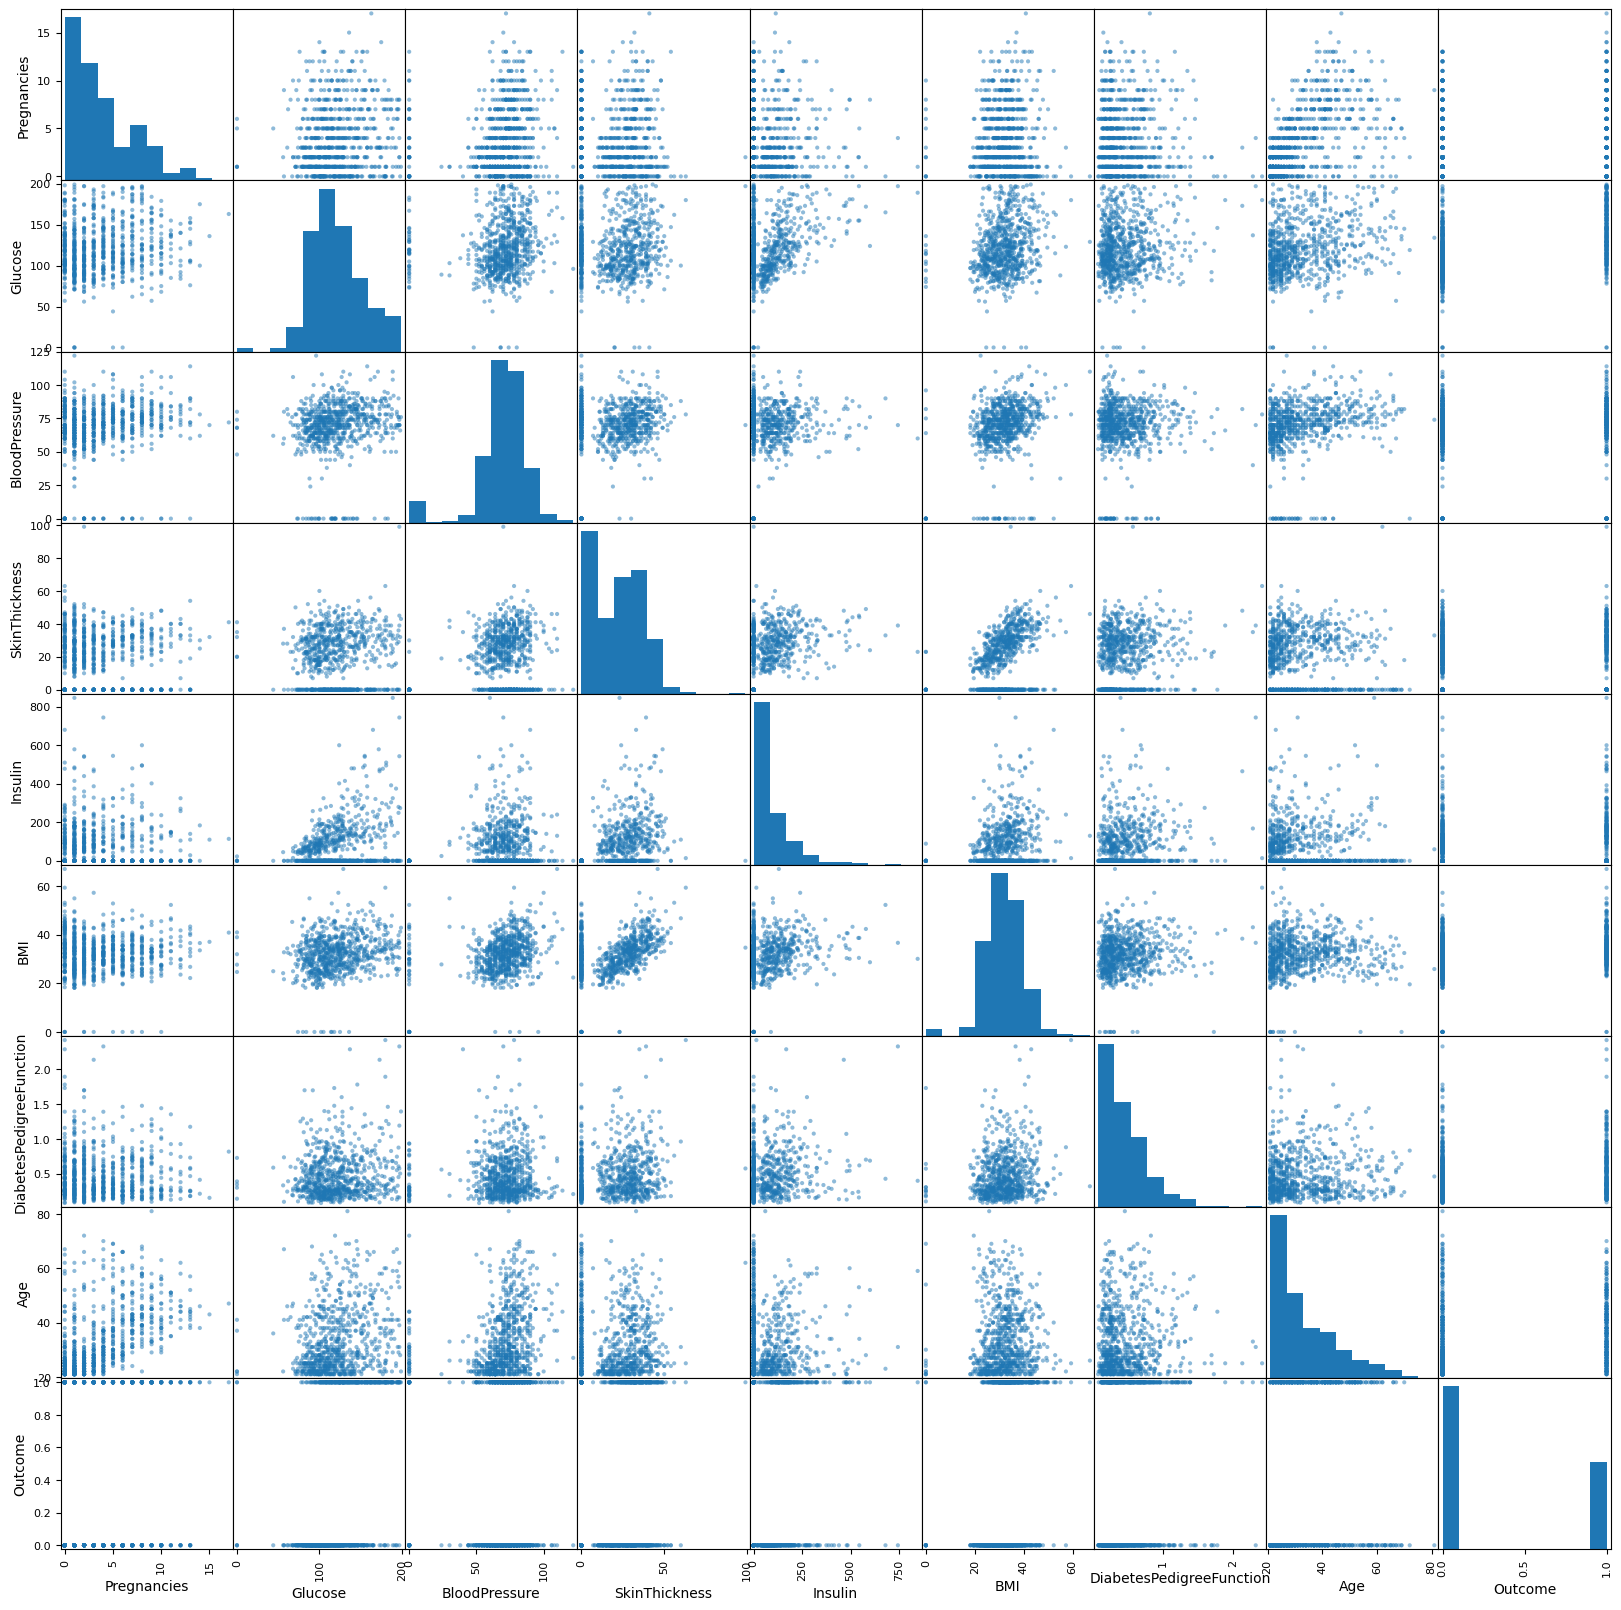

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20, 20))


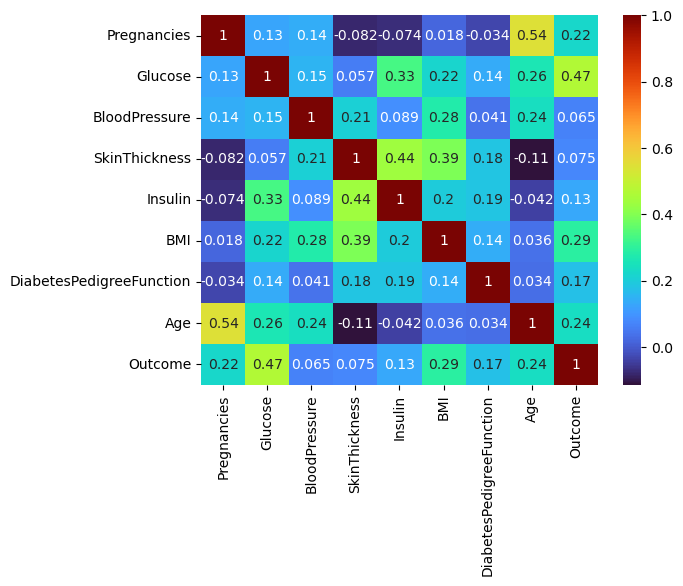

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='turbo')
plt.show()

# Split the dataset into train and test in proportion of 80% to 20%

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)

In [20]:
print(X.shape,X_train.shape,X_test.shape) 

(768, 8) (614, 8) (154, 8)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

# Train the Logistic regression model. Use 5-fold cross-validation method to find the best value for C parameter

In [22]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_mean_accuracy_scores = []
test_mean_accuracy_scores = []

for C in C_values:
    logistic_model_cv = LogisticRegressionCV(Cs=[C], cv=5, solver='liblinear', max_iter=1000)

    logistic_model_cv.fit(X_train, y_train)

    cv_scores_train = cross_val_score(logistic_model_cv, X_train, y_train, cv=5)
    
    train_mean_accuracy = cv_scores_train.mean()
    train_mean_accuracy_scores.append(train_mean_accuracy)

    test_score = logistic_model_cv.score(X_test, y_test)
    test_mean_accuracy_scores.append(test_score)

In [23]:
best_test_accuracy_index = np.argmax(test_mean_accuracy_scores)
best_C = C_values[best_test_accuracy_index]
best_test_accuracy = test_mean_accuracy_scores[best_test_accuracy_index]
print("Highest Mean Accuracy:", best_test_accuracy)
print("Best C-value:", best_C)

Highest Mean Accuracy: 0.7597402597402597
Best C-value: 100


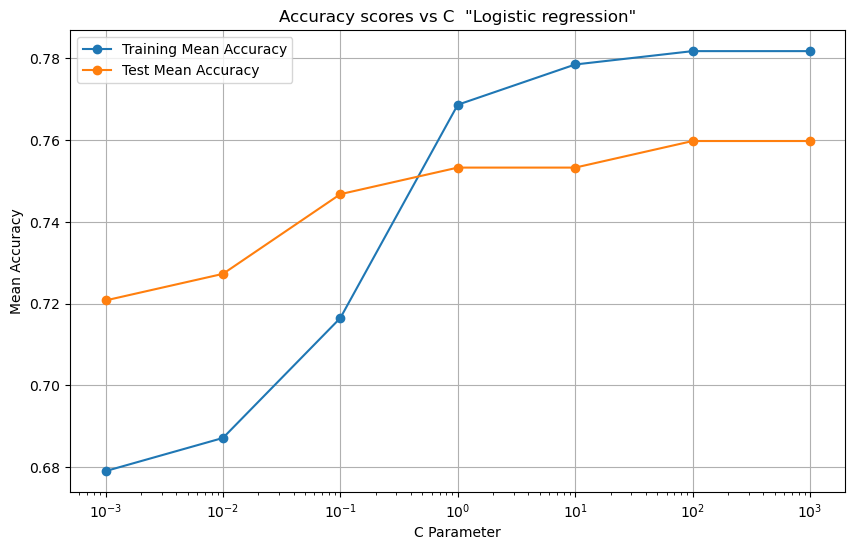

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_mean_accuracy_scores, marker='o', label='Training Mean Accuracy')
plt.plot(C_values, test_mean_accuracy_scores, marker='o', label='Test Mean Accuracy')
plt.xscale('log') 
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy scores vs C  "Logistic regression"')
plt.legend()
plt.grid(True)
plt.show()

# Train the KNN model. Use 5-fold cross-validation method to find the best value for K

In [27]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 30))

train_mean_accuracy_scores = []
test_mean_accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    cv_scores_knn_train = cross_val_score(knn_model, X_train, y_train, cv=5)
    train_mean_accuracy = cv_scores_knn_train.mean()
    train_mean_accuracy_scores.append(train_mean_accuracy)
    
    knn_model.fit(X_train, y_train)

    test_accuracy = knn_model.score(X_test, y_test)
    test_mean_accuracy_scores.append(test_accuracy)


In [31]:
highest_accuracy = max(train_mean_accuracy_scores)
index_of_highest_accuracy_train = train_mean_accuracy_scores.index(highest_accuracy)
k_value = k_values[index_of_highest_accuracy_train]
print("Highest Mean Accuracy ", highest_accuracy)
print("Best k Value ", k_value)

Highest Mean Accuracy  0.7409702785552446
Best k Value  26


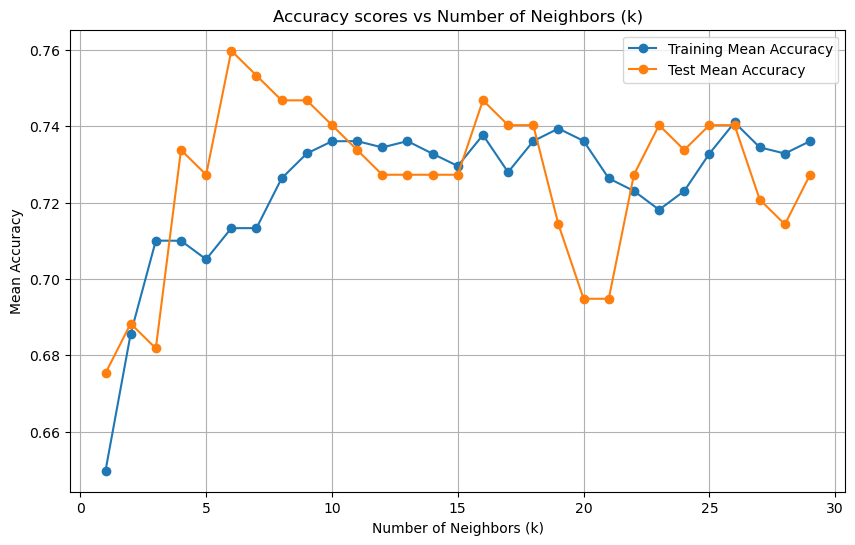

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mean_accuracy_scores, marker='o', label='Training Mean Accuracy')
plt.plot(k_values, test_mean_accuracy_scores, marker='o', label='Test Mean Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy scores vs Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()

# Train the SVM model. Use 5-fold cross-validation method to find the best value for C parameter

In [35]:
from sklearn.svm import SVC

k_folds = KFold(n_splits=10)

c_values = np.logspace(-3, 0, 3)

train_means = []
test_means = []

model = SVC(kernel='linear')

for c_value in c_values:
    
    train_scores = cross_val_score(model.set_params(C=c_value), X_train, y_train, cv=k_folds, n_jobs=-1)
    test_scores = cross_val_score(model.set_params(C=c_value), X_test, y_test, cv=k_folds, n_jobs=-1)

    train_means.append(np.mean(train_scores))
    test_means.append(np.mean(test_scores))



In [36]:
best_c_index = np.argmax(train_means)
best_c = c_values[best_c_index]
best_train_score = train_means[best_c_index]

print("Highest Mean Accuracy:", best_train_score)
print("Best C value:", best_c)



Highest Mean Accuracy: 0.7736382866208356
Best C value: 1.0


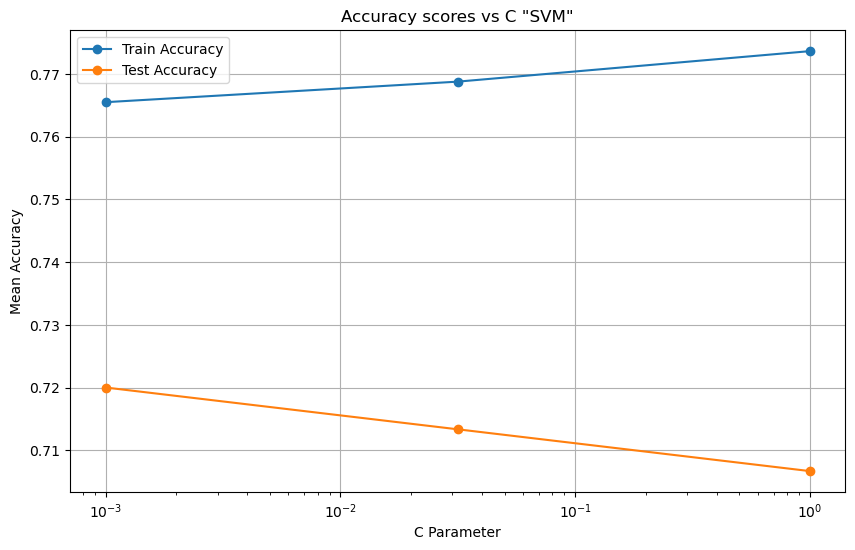

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_means, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(c_values, test_means, marker='o', linestyle='-', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy scores vs C "SVM"')
plt.legend()
plt.grid(True)
plt.show()

# Train the Decision Tree model. Use 5-fold cross-validation method to find the best value for max_depth

In [38]:
from sklearn.tree import DecisionTreeClassifier

max_depth_range = list(range(1, 20))

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_train = []
accuracy_test = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    
    cv_scores_train = cross_val_score(clf, X_train, y_train, cv=k_folds)
    mean_accuracy_train = np.mean(cv_scores_train)
    accuracy_train.append(mean_accuracy_train)
    
    clf.fit(X_train, y_train)
    accuracy_test.append(clf.score(X_test, y_test))




In [39]:
best_max_depth_index = np.argmax(accuracy_train)
best_max_depth = max_depth_range[best_max_depth_index]
best_accuracy_train = accuracy_train[best_max_depth_index]

print("Highest Mean Accuracy:", best_accuracy_train)
print("Best max_depth value :", best_max_depth)


Highest Mean Accuracy: 0.7639210982273757
Best max_depth value : 2


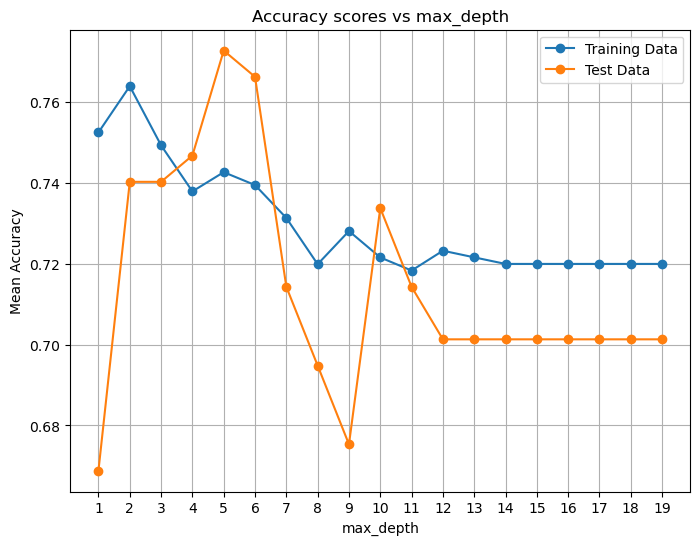

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, accuracy_train, marker='o', linestyle='-', label='Training Data')

accuracy_test = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    accuracy_test.append(clf.score(X_test, y_test))

plt.plot(max_depth_range, accuracy_test, marker='o', linestyle='-', label='Test Data')

plt.title('Accuracy scores vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.xticks(max_depth_range)
plt.legend()
plt.grid(True)
plt.show()


# Predict on the test data

In [41]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=10000)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)


In [42]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [43]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


In [44]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the model (Accuracy, Precision, Recall)

In [218]:
from sklearn.metrics import classification_report, confusion_matrix

logistic_regression_report = classification_report(y_test, logistic_regression_predictions)
svm_report = classification_report(y_test, svm_predictions)
knn_report = classification_report(y_test, knn_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("Logistic regression report:")
print(logistic_regression_report)

print("SVM report:")
print(svm_report)

print("KNN report:")
print(knn_report)

print("Decision tree report:")
print(decision_tree_report)


Logistic regression report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154

SVM report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       100
           1       0.84      0.48      0.61        54

    accuracy                           0.79       154
   macro avg       0.81      0.72      0.73       154
weighted avg       0.80      0.79      0.77       154

KNN report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.44      0.53        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.7

In [219]:
cm_logistic_regression = confusion_matrix(y_test, logistic_regression_predictions)
cm_svm = confusion_matrix(y_test, svm_predictions)
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_decision_tree = confusion_matrix(y_test, decision_tree_predictions)

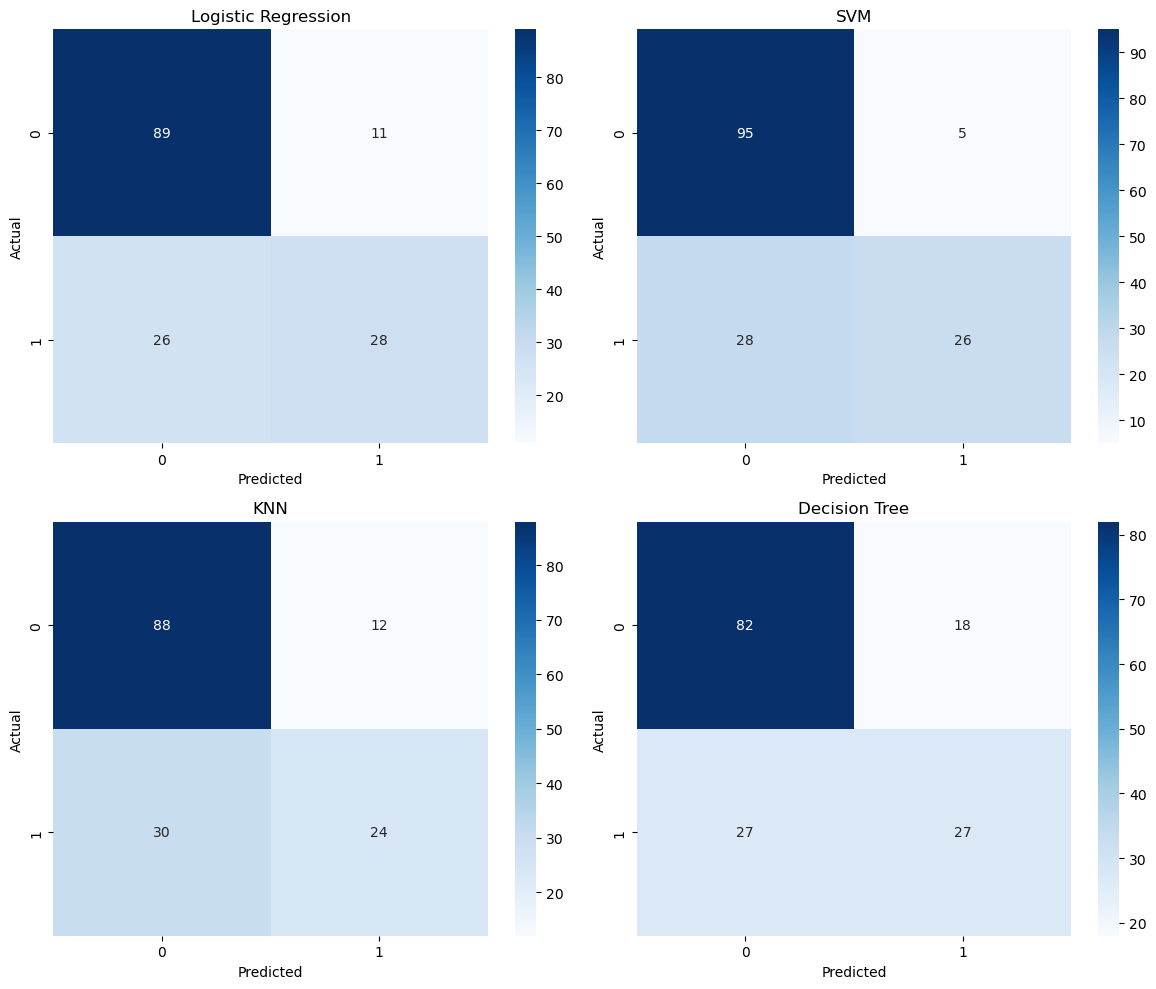

In [220]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(cm_logistic_regression, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')


sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title('SVM')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')


sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", ax=axes[1, 0])
axes[1, 0].set_title('KNN')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Blues", ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Random forest classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold


max_depth_range = list(range(1, 20))

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_train = []
accuracy_test = []

for depth in max_depth_range:
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    
    cv_scores_train = cross_val_score(clf, X_train, y_train, cv=k_folds)
    mean_accuracy_train = np.mean(cv_scores_train)
    accuracy_train.append(mean_accuracy_train)
    
    clf.fit(X_train, y_train)
    accuracy_test.append(clf.score(X_test, y_test))




In [46]:
best_max_depth_index = np.argmax(accuracy_train)
best_max_depth = max_depth_range[best_max_depth_index]
best_accuracy_train = accuracy_train[best_max_depth_index]

print("Highest Mean Accuracy:", best_accuracy_train)
print("Best max_depth value :", best_max_depth)

Highest Mean Accuracy: 0.7801945888311341
Best max_depth value : 6


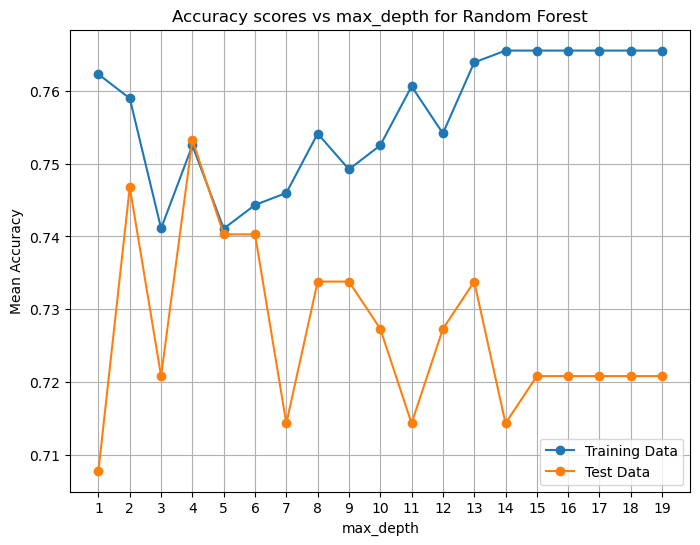

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, accuracy_train, marker='o', linestyle='-', label='Training Data')

plt.plot(max_depth_range, accuracy_test, marker='o', linestyle='-', label='Test Data')

plt.title('Accuracy scores vs max_depth for Random Forest')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.xticks(max_depth_range)
plt.legend()
plt.grid(True)
plt.show()

In [60]:
import xgboost as xgb
max_depth_range = list(range(1, 20))

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_train = []
accuracy_test = []

for depth in max_depth_range:
    clf = xgb.XGBClassifier(max_depth=depth, random_state=42)
    
    cv_scores_train = cross_val_score(clf, X_train, y_train, cv=k_folds)
    mean_accuracy_train = np.mean(cv_scores_train)
    accuracy_train.append(mean_accuracy_train)
    
    clf.fit(X_train, y_train)
    accuracy_test.append(clf.score(X_test, y_test))


In [61]:
best_max_depth_index = np.argmax(accuracy_train)
best_max_depth = max_depth_range[best_max_depth_index]
best_accuracy_train = accuracy_train[best_max_depth_index]

print("Highest Mean Accuracy:", best_accuracy_train)
print("Best max_depth value :", best_max_depth)

Highest Mean Accuracy: 0.7655204584832733
Best max_depth value : 14


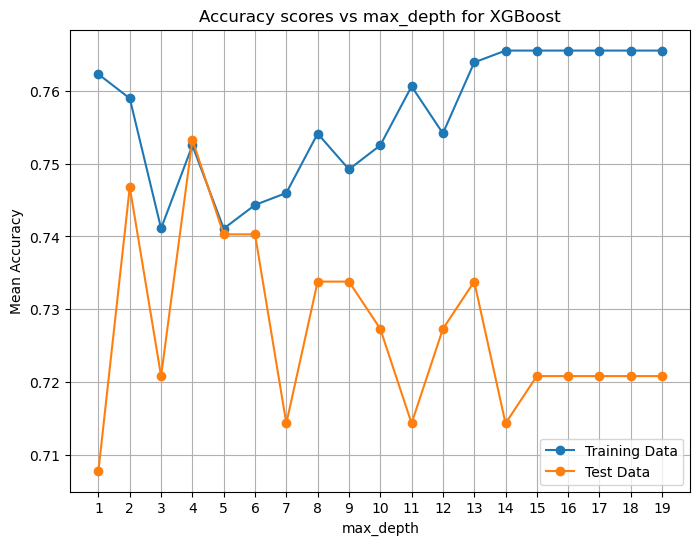

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, accuracy_train, marker='o', linestyle='-', label='Training Data')

plt.plot(max_depth_range, accuracy_test, marker='o', linestyle='-', label='Test Data')

plt.title('Accuracy scores vs max_depth for XGBoost')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.xticks(max_depth_range)
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test data

In [63]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=best_max_depth, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [64]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(max_depth=best_max_depth, random_state=42)
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)

# Evaluate the model (Accuracy, Precision, Recall)

In [65]:
from sklearn.metrics import classification_report

random_forest_report = classification_report(y_test, random_forest_predictions)
print("Random Forest Classification Report:")
print(random_forest_report)

xgboost_report = classification_report(y_test, xgboost_predictions)
print("\nXGBoost Classification Report:")
print(xgboost_report)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0.52      0.59        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [66]:
from sklearn.metrics import confusion_matrix
cm_random_forest = confusion_matrix(y_test, random_forest_predictions)
cm_xgboost = confusion_matrix(y_test, xgboost_predictions)

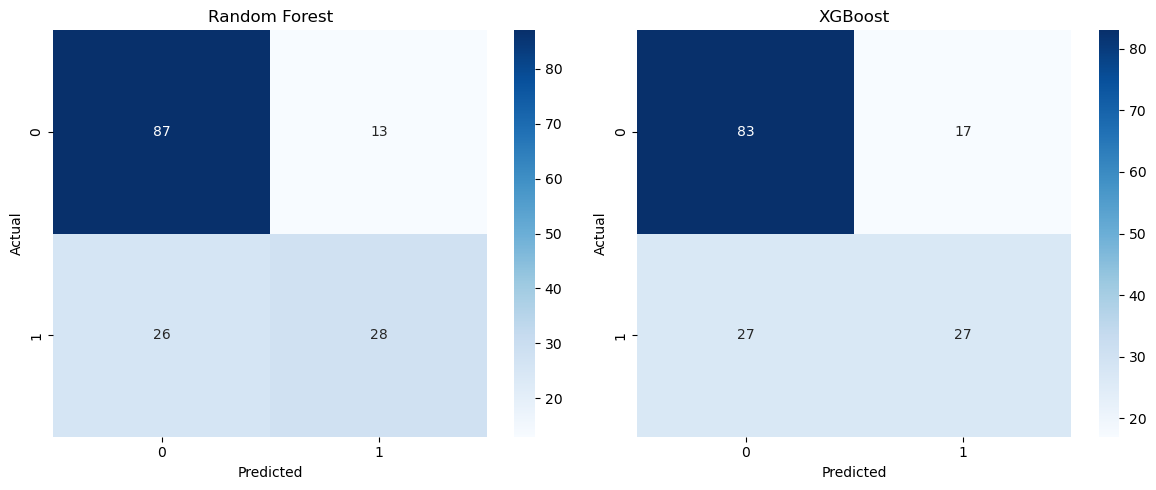

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgboost, annot=True, fmt="d", cmap="Blues")
plt.title('XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# Compare all models

Based on the analysis of the 4 machine learning models: Logistic Regression, SVM, KNN, and Decision Tree ,   SVM and Logistic Regression exhibited the highest accuracies among the models.

Specifically, SVM achieved the highest accuracy among the models, with a score of 79%, while Logistic Regression with an accuracy of 76%. This indicates that SVM and Logistic Regression correctly classified about 79% and 76% of the instances in the test set, respectively.

KNN and Decision Tree, on the other hand, exhibited lower accuracies of 73% and 69%, respectively, their accuracy scores were lower compared to SVM and Logistic Regression.

In conclusion, SVM and Logistic Regression emerged as the most accurate models among the four, demonstrating their effectiveness in classifying instances in the given dataset. This finding suggests that SVM or Logistic Regression may be the preferred choices when prioritizing accuracy in similar classification tasks.
In the second section 
Accuracy for Random forest has a higher accuracy 0.75 compared to XGBoost 0.71.



# References
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R (pp. 135-224). Springer Science & Business Media.

VanderPlas, J. (2017). Python Data Science Handbook (pp. 217-432). O'Reilly Media, Inc.

Buitinck, L., Louppe, G., Blondel, M., Pedregosa, F., Mueller, A., Grisel, O., ... Varoquaux, G. (2013). API design for machine learning software: Experiences from the scikit-learn project. European Conference on Machine Learning and Principles and Practice of Knowledge Discovery in Databases.(3.1. Cross-validation: evaluating estimator performance)

Awan, A. A. (n.d.). K-Nearest Neighbors (KNN) Classification with R Tutorial. DataCamp. Retrieved from https://www.datacamp.com/tutorial/k-nearest-neighbors-knn-classification-with-r-tutorial
